# 2 - Introductory Example: Ground Irradiance Analysis for AgriPV

This jupyter journal will walk us through the creation of the most basic fixed-tilt simulation possible with bifacialvf.
We will simulate a 1-up landscape system over a grass albedo and look at the ground irradiance from the start of 1 row to the other.


In [2]:
from pathlib import Path
import os
import bifacialvf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



# IO Files
testfolder = Path().resolve().parent.parent / 'bifacialvf' / 'TEMP' / 'Experiment_1'
if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [ ]:
plt.rcParams['timezone'] = 'Etc/GMT+7'
font = {'family' : 'DejaVu Sans',
'weight' : 'bold',
'size'   : 22}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (12, 5)

In [11]:
# Variables

months = ['May','Jun','Jul','Aug','Sep','Oct']
lat = 32.25
lon = -110.9  #Lat and Long for Tuscon Arizona           
sazm = 180                  
albedo = 0.31  # Changed from 0.31 for test 6/9/22
x = 1
y = 2 
rowType = "interior"        # RowType(first interior last single)
transFactor = 0             # TransmissionFactor(open area fraction)
sensorsy = 12   # sensorsy(# hor rows in panel)   <--> THIS ASSUMES LANDSCAPE ORIENTATION 
PVfrontSurface = "glass"    # PVfrontSurface(glass or ARglass)
PVbackSurface = "glass"     # PVbackSurface(glass or ARglass)
agriPV = True
numpanels = 1
#xgap =  0.9144   
#nMods = 7
#ygap = .02 # Meters
#numpanels = 4
CW = y * numpanels
#CW = x + 2*xgap 

#Arrays for loops
tilts = [20,30]  
clearance_heights = np.array([0.25,0.5,0.75,1,1.5,2]) 
GCRs = [0.28,0.33,0.4,0.6]
#Defaults
tilt_def = tilts[0]
clearance_height_def = clearance_heights[2]
GCR_def = GCRs[1]
pitch_def = CW/GCR_def/CW
module_place = CW/GCR_def
 
# Tracking instructions
tracking=False
backtrack=False
limit_angle = 65





In [6]:
#Get weather file for Tuscon AZ
TMYtoread=bifacialvf.getEPW(lat=lat,lon=lon, path = testfolder)
myTMY3, meta = bifacialvf.readInputTMY(TMYtoread)
deltastyle = 'TMY3'

path = C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1
Getting weather file: USA_AZ_Davis-Monthan.AFB.722745_TMY3.epw
 ... OK!


## Experiment for tilt

Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.75   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_Tilt_20.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [03:32<00:00, 41.30it/s]


Finished
date            Jan           Feb            Mar            Apr  \
0      98803.175207  90530.787351  134773.118509  202124.875802   
1     100343.107940  90242.621302  134333.345432  200129.354108   
2     100994.183048  90117.312609  133906.425722  197588.760928   
3     101453.566657  89829.253197  133496.898692  193379.035319   
4     101522.905223  89619.860124  133106.490171  190109.780774   
..              ...           ...            ...            ...   
95     94317.291204  90605.409019  136887.675941  209316.566052   
96     94925.806329  90726.951416  136426.933666  207998.041447   
97     95890.006590  90669.220801  135944.391207  206416.146803   
98     96529.874729  90548.147309  135475.588291  204900.767343   
99     97677.857673  90512.615695  135061.225303  203389.354512   

date            May            Jun            Jul            Aug  \
0     196047.563238  172529.808584  163026.806611  171055.011006   
1     185303.467694  152436.599038  149978.655951 

100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [03:32<00:00, 41.32it/s]


Finished
date           Jan           Feb            Mar            Apr            May  \
0     91849.558328  89334.103063  135505.138429  202795.092173  196667.674578   
1     92884.037887  89154.002132  135089.914949  200791.436228  185942.472465   
2     93356.309941  89068.599564  134727.286018  198288.116018  172090.227518   
3     93997.531200  89241.165065  134338.700268  194094.623342  153375.478926   
4     94680.749606  89092.926767  133969.268700  190816.837842  116934.424759   
..             ...           ...            ...            ...            ...   
95    88459.113001  89898.906872  137448.666988  209850.468543  221369.898902   
96    90080.961463  90107.781932  137017.027152  208553.085503  218590.604975   
97    90537.020166  89800.533433  136563.257553  207015.862735  214550.980739   
98    90883.750604  89502.481337  136174.603951  205508.653046  209108.396248   
99    91645.265429  89426.096442  135735.192553  204017.398325  202255.324675   

date            Ju

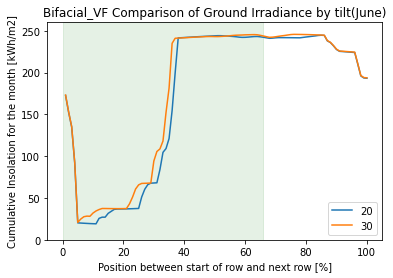

In [10]:
for ti in range (0, len(tilts)):
        #Build scene and run raytracing for all 3 azimuths
    tilt = tilts[ti]
    writefiletitle = os.path.join(testfolder, 'Results_Test_Tilt_'+str(tilt)+'.csv')
    bifacialvf.simulate(myTMY3, meta, writefiletitle=writefiletitle, 
                        tilt=tilt, sazm=sazm, pitch=pitch_def, clearance_height=clearance_height_def, 
                        rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
                        PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
                        albedo=albedo, tracking=tracking, backtrack=backtrack, 
                        limit_angle=limit_angle, deltastyle=deltastyle, agriPV=True)


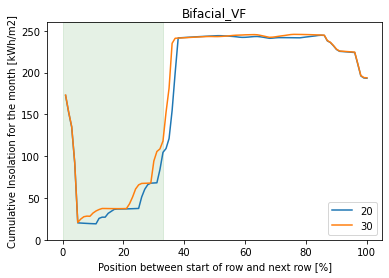

In [131]:
# Graph Tilts
for ti in range (0, len(tilts)):
    tilt = tilts[ti]
    writefiletitle = os.path.join(testfolder, 'Results_Test_Tilt_'+str(tilt)+'.csv')
    #Load the results from the resultfile
    from bifacialvf import loadVFresults
    (data, metadata) = loadVFresults(writefiletitle)
    #Work with data in resultfile
    data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
    data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
    groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
    df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
    df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                       df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                       df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)
    #xstep = (len(data_line_f))
    x_axis = list(range(1,101))
    #x_axis_rad = np.linspace(0,100,xstep)
    plt.figure(1)
    VF = plt.plot(x_axis, df['Jun']/1000, label=tilt)
    #fig = (df['May']/1000).plot()
    #Radiance = plt.plot(x_axis_rad,data_line_f['Wm2Front']/1000, label='Radiance')
    #fig.set_xlabel('Position between start of row and next row [%]')
    #fig.set_ylabel('Cumulative Insolation for the month [kWh/m2]')
    module_end = (2/module_place)*100 #Percentage between rows where the module ends)
    plt.axvspan(0, module_end, alpha=.05, color='green')
    plt.title('Bifacial_VF')
    plt.ylim([0, 260])
    plt.xlabel('Position between start of row and next row [%]')
    plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
    plt.legend()

## Experiment for Clearance height

Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.125   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_ClearanceHeight_0.25.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [03:05<00:00, 47.16it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.25   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_ClearanceHeight_0.5.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [03:15<00:00, 44.85it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.375   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_ClearanceHeight_0.75.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [03:28<00:00, 41.96it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.5   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_ClearanceHeight_1.0.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [03:12<00:00, 45.56it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.75   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_ClearanceHeight_1.5.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [03:28<00:00, 42.00it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  1.0   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_ClearanceHeight_2.0.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [03:34<00:00, 40.89it/s]


Finished


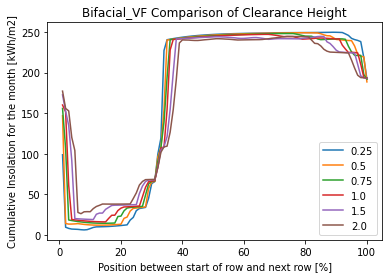

In [9]:
for ch in range (0, len(clearance_heights)):
    chreg = clearance_heights[ch]
    clearance_height = chreg/CW #Normalize using the collector width. Needed for bifacial VF
    writefiletitle = os.path.join(testfolder, 'Results_Test_ClearanceHeight_'+str(chreg)+'.csv')
    bifacialvf.simulate(myTMY3, meta, writefiletitle=writefiletitle, 
                        tilt=tilt_def, sazm=sazm, pitch=pitch_def, clearance_height=clearance_height, 
                        rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
                        PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
                        albedo=albedo, tracking=tracking, backtrack=backtrack, 
                        limit_angle=limit_angle, deltastyle=deltastyle, agriPV=True)


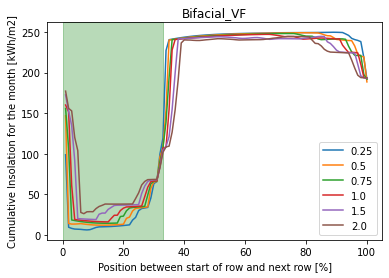

In [134]:
for ch in range (0, len(clearance_heights)):
    #Build scene and run raytracing for all 3 azimuths
    chreg = clearance_heights[ch]
    clearance_height = chreg/CW #Normalize using the collector width. Needed for bifacial VF
    writefiletitle = os.path.join(testfolder, 'Results_Test_ClearanceHeight_'+str(chreg)+'.csv')
    #Load the results from the resultfile
    from bifacialvf import loadVFresults
    (data, metadata) = loadVFresults(writefiletitle)
    #Work with data in resultfile
    data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
    data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
    groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
    df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
    df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                       df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                       df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)
    #xstep = (len(data_line_f))
    x_axis = list(range(1,101))
    #x_axis_rad = np.linspace(0,100,xstep)
    plt.figure(1)
    VF = plt.plot(x_axis, df['Jun']/1000, label=chreg)
    #fig = (df['May']/1000).plot()
    #Radiance = plt.plot(x_axis_rad,data_line_f['Wm2Front']/1000, label='Radiance')
    #fig.set_xlabel('Position between start of row and next row [%]')
    #fig.set_ylabel('Cumulative Insolation for the month [kWh/m2]')
    module_end = (2/module_place)*100 #Percentage between rows where the module ends)
    plt.axvspan(0, module_end, alpha=.05, color='green')
    plt.title('Bifacial_VF')
    plt.xlabel('Position between start of row and next row [%]')
    plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
    plt.legend()

## Experiment for GCR

Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.375   Pitch:  7.142857142857142   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_GCR_0.28.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  6.2031645220712335
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|█████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:25<00:00, 102.98it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.375   Pitch:  6.0606060606060606   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_GCR_0.33.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  5.120913439820152
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|█████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:27<00:00, 100.57it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.375   Pitch:  5.0   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_GCR_0.4.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  4.060307379214091
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|█████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:27<00:00, 100.02it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.375   Pitch:  3.3333333333333335   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_GCR_0.6.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.393640712547425
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:30<00:00, 97.05it/s]


Finished


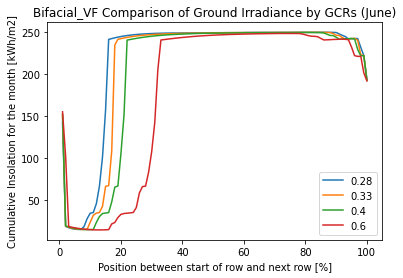

In [28]:
for gc in range (0, len(GCRs)):
    GCR = GCRs[gc]
    pitch = CW/GCR
    writefiletitle = os.path.join(testfolder, 'Results_Test_GCR_'+str(GCR)+'.csv')
    bifacialvf.simulate(myTMY3, meta, writefiletitle=writefiletitle, 
                        tilt=tilt_def, sazm=sazm, pitch=pitch, clearance_height=clearance_height_def, 
                        rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
                        PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
                        albedo=albedo, tracking=tracking, backtrack=backtrack, 
                        limit_angle=limit_angle, deltastyle=deltastyle, agriPV=True)

  

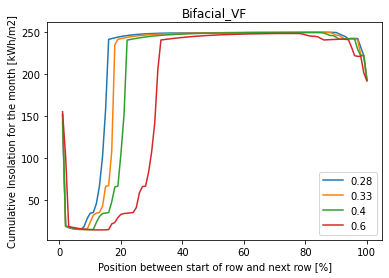

In [136]:
for gc in range (0, len(GCRs)):
    GCR = GCRs[gc]
    pitch = CW/GCR
    writefiletitle = os.path.join(testfolder, 'Results_Test_GCR_'+str(GCR)+'.csv')
    #Load the results from the resultfile
    from bifacialvf import loadVFresults
    (data, metadata) = loadVFresults(writefiletitle)
    #Work with data in resultfile
    data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
    data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
    groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
    df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
    # I'm sure there's a fancier way to do this but hey, this works.
    df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                       df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                       df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)
    #xstep = (len(data_line_f))
    x_axis = list(range(1,101))
    #x_axis_rad = np.linspace(0,100,xstep)
    plt.figure(1)
    VF = plt.plot(x_axis, df['Jun']/1000, label=GCR)
    #fig = (df['May']/1000).plot()
    #Radiance = plt.plot(x_axis_rad,data_line_f['Wm2Front']/1000, label='Radiance')
    #fig.set_xlabel('Position between start of row and next row [%]')
    #fig.set_ylabel('Cumulative Insolation for the month [kWh/m2]')
    module_end = (2/pitch)*100 #Percentage between rows where the module ends)
    #plt.axvspan(0, module_end, alpha=.05, color='green')
    plt.title('Bifacial_VF')
    plt.xlabel('Position between start of row and next row [%]')
    plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
    plt.legend()

## Compare VF and Radiance

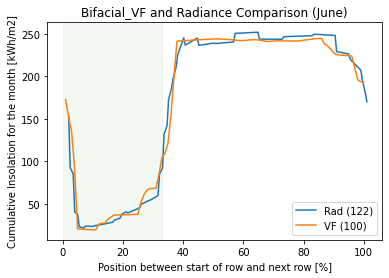

In [16]:
from bifacialvf import loadVFresults
VFfile = r'C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_Tilt_20.csv'
(data, metadata) = loadVFresults(VFfile)
#Work with data in resultfile
data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
# I'm sure there's a fancier way to do this but hey, this works.
df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                   df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                   df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)
#xstep = (len(data_line_f))
x_axis = list(range(1,101))
#x_axis_rad = np.linspace(0,100,xstep)

#fig = (df['May']/1000).plot()
#Radiance = plt.plot(x_axis_rad,data_line_f['Wm2Front']/1000, label='Radiance')
Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Experiment_1\results\irr_Rad_Experiment1_tilt_20_Ground_Analysis_Front.csv'
(dataR, metadata) = loadVFresults(Radiance_File)
data_lineR = dataR#.iloc[13220:13285] #Account for the three lines ignored in the loadVFresults command. Don't need them since 
data_line_fR = data_lineR[::-1].reset_index(drop = True)
data_line_fR.rename(columns={ data_line_fR.columns[0]: "x", data_line_fR.columns[1]: "y",data_line_fR.columns[2]: "z", data_line_fR.columns[3]: "mattype",data_line_fR.columns[4]: "Wm2Front",}, inplace = True)
#Radirr = Radmin/ghitot
#VFirr = VFmin/ghitot
#Rad_irr_factor.append(Radirr)
#VF_irr_factor.append(VFirr)
#fig.set_xlabel('Position between start of row and next row [%]')
#fig.set_ylabel('Cumulative Insolation for the month [kWh/m2]')
yshift = data_line_fR['y'] + 1
ystep = (yshift/6.06)*100
#Plot Radiance and VF lines
plt.figure(1)
Rad = plt.plot(ystep, data_line_fR['Wm2Front']/1000, label='Rad (122)')
VF = plt.plot(x_axis, df['Jun']/1000, label='VF (100)')
module_end = (2/module_place)*100 #Percentage between rows where the module ends)
plt.axvspan(0, module_end, alpha=.05, color='green')
plt.title('Bifacial_VF and Radiance Comparison (June)')
plt.xlabel('Position between start of row and next row [%]')
plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
plt.legend()

## Changing Transmission Factor

In [21]:
xl = 2
yl = 1 
ygaps = [0,.1,.2,.3,.5,1]
numpanels_l = 2


for yg in range (0, len(ygaps)):
        #Build scene and run raytracing for all 3 azimuths
    ygap = ygaps[yg]
    CW = yl * numpanels_l +(ygap * (numpanels_l-1)) #Collector Width
    AA = yl*numpanels_l #Area of module that light hits
    transFactor = 1 - (AA/CW) # TransmissionFactor(open area fraction)
    pitch = CW/GCR_def/CW
    print(CW,AA,transFactor)
    writefiletitle = os.path.join(testfolder, 'Results_Test_TFactor_'+str(transFactor)+'.csv')
    bifacialvf.simulate(myTMY3, meta, writefiletitle=writefiletitle, 
                        tilt=tilt_def, sazm=sazm, pitch=pitch, clearance_height=clearance_height_def, 
                        rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
                        PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
                        albedo=albedo, tracking=tracking, backtrack=backtrack, 
                        limit_angle=limit_angle, deltastyle=deltastyle, agriPV=True)

2 2 0.0
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.75   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_TFactor_0.0.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:43<00:00, 84.43it/s]


Finished
2.1 2 0.04761904761904767
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.75   Pitch:  3.03030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_TFactor_0.04761904761904767.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.0906104095171214
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:45<00:00, 83.28it/s]


Finished
2.2 2 0.09090909090909094
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.75   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_TFactor_0.09090909090909094.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:41<00:00, 86.52it/s]


Finished
2.3 2 0.13043478260869557
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.75   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_TFactor_0.13043478260869557.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:40<00:00, 86.97it/s]


Finished
2.5 2 0.19999999999999996
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.75   Pitch:  3.0303030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_TFactor_0.19999999999999996.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.090610409517122
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:41<00:00, 86.32it/s]


Finished
3 2 0.33333333333333337
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   Davis Monthan Afb
Lat:  32.17  Long:  -110.88  Tz  -7.0
Parameters: tilt:  20   Sazm:  180     Clearance_Height :  0.75   Pitch:  3.03030303030303   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_TFactor_0.33333333333333337.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.7447282075136877
Actual distance between rows =  2.0906104095171214
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:46<00:00, 81.92it/s]

Finished


2 2 0.0
2.1 2 0.04761904761904767
2.2 2 0.09090909090909094
2.3 2 0.13043478260869557
2.5 2 0.19999999999999996
3 2 0.33333333333333337


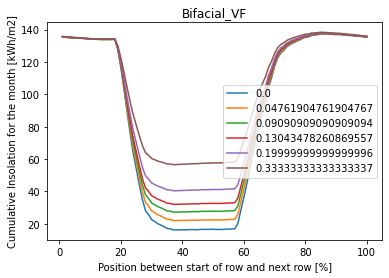

In [138]:
xl = 2
yl = 1 
ygaps = [0,.1,.2,.3,.5,1]
numpanels_l = 2


for yg in range (0, len(ygaps)):
        #Build scene and run raytracing for all 3 azimuths
    ygap = ygaps[yg]
    CW = yl * numpanels_l +(ygap * (numpanels_l-1)) #Collector Width
    AA = yl*numpanels_l #Area of module that light hits
    transFactor = 1 - (AA/CW) # TransmissionFactor(open area fraction)
    pitch = CW/GCR_def/CW
    print(CW,AA,transFactor)
    writefiletitle = os.path.join(testfolder, 'Results_Test_TFactor_'+str(transFactor)+'.csv')

    #Load the results from the resultfile
    from bifacialvf import loadVFresults
    (data, metadata) = loadVFresults(writefiletitle)
    #Work with data in resultfile
    data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
    data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
    groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
    df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
    # I'm sure there's a fancier way to do this but hey, this works.
    df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                       df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                       df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)
    #xstep = (len(data_line_f))
    x_axis = list(range(1,101))
    #x_axis_rad = np.linspace(0,100,xstep)
    plt.figure(1)
    VF = plt.plot(x_axis, df['Oct']/1000, label=transFactor)
    #fig = (df['May']/1000).plot()
    #Radiance = plt.plot(x_axis_rad,data_line_f['Wm2Front']/1000, label='Radiance')
    #fig.set_xlabel('Position between start of row and next row [%]')
    #fig.set_ylabel('Cumulative Insolation for the month [kWh/m2]')
    plt.title('Bifacial_VF')
    plt.xlabel('Position between start of row and next row [%]')
    plt.ylabel('Cumulative Insolation for the month [kWh/m2]')
    plt.legend()

# 5.Compare Radiance and VF for Nespelem, WA


In [104]:


# Variablee
starttimes =['2005-05-01 1:30:0', '2007-06-01 1:30:0', '2020-07-01 1:30:0', '2020-08-01 1:30:0', '2002-09-01 1:30:0', '1998-10-01 1:30:0']
endtimes = ['2005-05-31 23:30:0', '2007-06-30 23:30:0','2020-07-31 23:30:0', '2020-08-31 23:30:0', '2002-09-30 23:30:0', '1998-10-31 23:30:0']
months = ['May','Jun','Jul','Aug','Sep','Oct']
lat = 48.167039
lon = -118.976656  #Lat and Long for Nespelem, WA           
tilt = 25                  # PV tilt (deg)
sazms = np.array([180, 150, 210]) #cycling through 3 different azimuths                  # PV Azimuth(deg) or tracker axis direction
albedo = 0.31  # Changed from 0.31 
x = 2.031
y = 1.008 
xgap =  0.9144   
nMods = 7
ygap = .02 # Meters
numpanels = 4
CW = y * numpanels + (numpanels-1)*ygap
#CW = x + 2*xgap
clearance_height=1.45/CW #1.5m / collector width
D = 2.8    

 

pitch = (((y * numpanels) * np.cos(np.radians(tilt)))+D)/CW
print(pitch)
#pitch = 2/0.35/2              # 1 / 0.35 where 0.35 is gcr --- row to row spacing in normalized panel lengths. 
rowType = "interior"        # RowType(first interior last single)
transFactor = 0             # TransmissionFactor(open area fraction)
sensorsy = 12   # sensorsy(# hor rows in panel)   <--> THIS ASSUMES LANDSCAPE ORIENTATION 
PVfrontSurface = "glass"    # PVfrontSurface(glass or ARglass)
PVbackSurface = "glass"     # PVbackSurface(glass or ARglass)
agriPV = True

 # Calculate PV Output Through Various Methods    
# calculateBilInterpol = False   # Only works with landscape at the moment.
# calculatePVMismatch = False
# portraitorlandscape='portrait'   # portrait or landscape
# cellsnum = 72
# bififactor = 1.0

# Tracking instructions
tracking=False
backtrack=False
limit_angle = 65



#for ti in range (0, len(starttimes)):
 #   starttime = pd.to_datetime(starttimes[ti])
  #  endtime = pd.to_datetime(endtimes[ti])
   # month = months[ti]
    #demo.readWeatherFile(epwfile, starttime=starttime, endtime=endtime) # Name and path
    # Download and Read input
    #TMYtoread=bifacialvf.getEPW(lat=lat,lon=lon, path = testfolder)
TMYtoread = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Nespelem_test2\EPWs\nespelem_wa_48.167039_-118.976656_psm3-tmy_60_tmy_TMY3formatV2.csv'
myTMY3, meta = bifacialvf.readInputTMY(TMYtoread) #starttime=starttime, endtime=endtime these don't work. Need another way to control dates
deltastyle = 'TMY3'
    #myTMY3 = myTMY3.iloc[0:24].copy()  # Simulate just the first 24 hours of the data file for speed on this example
for az in range (0, len(sazms)):
        #Build scene and run raytracing for all 3 azimuths
    sazm = sazms[az]
    writefiletitle = os.path.join(testfolder, 'Results_Test_az_'+str(sazm)+'.csv')
    bifacialvf.simulate(myTMY3, meta, writefiletitle=writefiletitle, 
                        tilt=tilt, sazm=sazm, pitch=pitch, clearance_height=clearance_height, 
                        rowType=rowType, transFactor=transFactor, sensorsy=sensorsy, 
                        PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, 
                        albedo=albedo, tracking=tracking, backtrack=backtrack, 
                        limit_angle=limit_angle, deltastyle=deltastyle, agriPV=True)

#Load the results from the resultfile
from bifacialvf import loadVFresults
(data, metadata) = loadVFresults(writefiletitle)

1.5772807911367968
Calculating Sun position with a delta of -30 mins. i.e. 12 is 11:30 sunpos
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   NESPELEM
Lat:  48.17  Long:  -118.98  Tz  -8.0
Parameters: tilt:  25   Sazm:  180     Clearance_Height :  0.3543499511241447   Pitch:  1.5772807911367968   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_az_180.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  2.0197831672109294
Actual distance between rows =  0.6709730041001468
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:47<00:00, 81.48it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   NESPELEM
Lat:  48.17  Long:  -118.98  Tz  -8.0
Parameters: tilt:  25   Sazm:  150     Clearance_Height :  0.3543499511241447   Pitch:  1.5772807911367968   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_az_150.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  2.5431554219159778
Actual distance between rows =  0.6709730041001468
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:41<00:00, 86.30it/s]


Finished
Albedo value passed, but also present in TMY3 file.  Using albedo value passed. To use the ones in TMY3 file re-run simulation with albedo=None

 
********* 
Running Simulation for TMY3: 
Location:   NESPELEM
Lat:  48.17  Long:  -118.98  Tz  -8.0
Parameters: tilt:  25   Sazm:  210     Clearance_Height :  0.3543499511241447   Pitch:  1.5772807911367968   Row type:  interior   Albedo:  0.31
Saving into C:\Users\jjones\Documents\GitHub\bifacialvf\bifacialvf\TEMP\Experiment_1\Results_Test_az_210.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.9552116439657368
Actual distance between rows =  0.6709730041001468
 
Saving Ground Irradiance Values for AgriPV Analysis. 


100%|██████████████████████████████████████████████████████████████████████████████| 8760/8760 [01:42<00:00, 85.44it/s]


Finished


In [105]:
from bifacialvf import loadVFresults
writefile180 = os.path.join(testfolder,'Results_Test_az_180.csv')
(data, metadata) = loadVFresults(writefile180)

In [106]:
data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
groundIrrads = data['Ground Irradiance Values'].str.strip('[]').str.split(' ', expand=True).astype(float)
df = groundIrrads.groupby([pd.Grouper(freq='M')]).sum().T
# I'm sure there's a fancier way to do this but hey, this works.
df.rename(columns={ df.columns[0]: "Jan", df.columns[1]: "Feb",df.columns[2]: "Mar", df.columns[3]: "Apr",

                   df.columns[4]: "May",df.columns[5]: "Jun",df.columns[6]: "Jul",df.columns[7]: "Aug",
                   df.columns[8]: "Sep",df.columns[9]: "Oct",df.columns[10]: "Nov",df.columns[11]: "Dec"    }, inplace = True)

In [108]:
print(df)

date          Jan          Feb           Mar            Apr            May  \
0     5164.762291  7639.476759  14460.960643  120430.441288  154470.469449   
1     4978.705220  7364.269772  15051.538926  123008.467380  152268.344598   
2     4794.595760  7091.943600  14842.907116  123674.574255  146103.782095   
3     4614.041639  6824.876322  15532.220354  126016.773868  143331.252140   
4     4438.540067  6565.282539  17387.402242  125617.762771  140962.749702   
..            ...          ...           ...            ...            ...   
95    6034.332931  8925.705305  15791.749515  102552.681788  161340.772887   
96    5861.657297  8670.291520  15520.346339  106046.364394  160508.476799   
97    5682.720685  8405.616785  15078.951230  109772.648511  159850.288753   
98    5499.011254  8133.882318  14851.848208  113090.704660  159174.544698   
99    5312.129765  7857.455890  14779.788701  117078.928151  158487.132766   

date            Jun            Jul            Aug           Sep

In [109]:
print(df.Jun.min())

15042.352483735353


## Bring in Corresponing data from Bifacial Radiance

In [110]:
from bifacialvf import loadVFresults
Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Nespelem_test2\results\irr_nespelem_May_az_180_Ground_Analysis_Front.csv'
(data2, metadata) = loadVFresults(Radiance_File)

In [111]:
#Based on calculations, the points in the bifacial radiance file that correspond with the points in the bifacialvf
# file are (0,-1.825) to (0,4.625). This is rows 13222 through 13287 (65 points) in the excel file. Will isolate these rows
#data2.rename(columns={ data2.columns[0]: "x", data2.columns[1]: "y",data2.columns[2]: "z", data2.columns[3]: "mattype",
                   #data2.columns[4]: "Wm2Front",}, inplace = True)
#print(data2)
data_line = data2.iloc[13220:13285] #Account for the three lines ignored in the loadVFresults command. Don't need them since 
#data_line_f=np.flipud(data_line)
data_line_f = data_line[::-1].reset_index(drop = True) 
data_line_f.rename(columns={ data_line_f.columns[0]: "x", data_line_f.columns[1]: "y",data_line_f.columns[2]: "z", data_line_f.columns[3]: "mattype",data_line_f.columns[4]: "Wm2Front",}, inplace = True)
#we're focused on later points.
print(data_line_f)
#print(data_line_f['Wm2Front'].min())

      x         y     z      mattype  Wm2Front
0   0.0 -1.906850  0.05  groundplane  193895.1
1   0.0 -1.805881  0.05  groundplane  193880.9
2   0.0 -1.704913  0.05  groundplane  193866.6
3   0.0 -1.603944  0.05  groundplane  191958.2
4   0.0 -1.502975  0.05  groundplane  189798.0
..  ...       ...   ...          ...       ...
60  0.0  4.151277  0.05  groundplane  188938.0
61  0.0  4.252246  0.05  groundplane  190665.8
62  0.0  4.353214  0.05  groundplane  191916.5
63  0.0  4.454183  0.05  groundplane  192844.0
64  0.0  4.555152  0.05  groundplane  192800.1

[65 rows x 5 columns]


In [112]:
xstep = (len(data_line_f))
x_axis = list(range(1,101))
x_axis_rad = np.linspace(0,100,xstep)
#print(x_axis_rad)
#print(x_axis)

## Bar Plots of Irradiance Factors for each month

In [113]:
#data.set_index(pd.to_datetime(data['date']), inplace=True, drop=True)
#data.index = data.index.map(lambda t: t.replace(year=2021))   # Chagning to be the same year
ghi = data['ghi'] #.str.strip('[]').str.split(' ', expand=True).astype(float)

In [114]:
dates = ['May','Jun','Jul','Aug','Sep','Oct']
dghi = ghi.groupby([pd.Grouper(freq='M')]).sum().T
# I'm sure there's a fancier way to do this but hey, this works.
print(dghi)
#dghi.rename(columns={ dghi.rows[0]: "Jan", dghi.columns[1]: "Feb",dghi.columns[2]: "Mar", dghi.columns[3]: "Apr",
                   #dghi.columns[4]: "May",dghi.columns[5]: "June",dghi.columns[6]: "July",dghi.columns[7]: "Aug",
                   #dghi.columns[8]: "Sept",dghi.columns[9]: "Oct",dghi.columns[10]: "Nov",dghi.columns[11]: "Dec"    }, inplace = True)

date
2021-01-31 00:00:00-08:00     31408.852748
2021-02-28 00:00:00-08:00     58163.039240
2021-03-31 00:00:00-08:00    102667.133770
2021-04-30 00:00:00-08:00    153951.742639
2021-05-31 00:00:00-08:00    193226.204375
2021-06-30 00:00:00-08:00    203666.180803
2021-07-31 00:00:00-08:00    233165.445912
2021-08-31 00:00:00-08:00    201076.287745
2021-09-30 00:00:00-08:00    138290.738569
2021-10-31 00:00:00-08:00     84477.895755
2021-11-30 00:00:00-08:00     42850.672965
2021-12-31 00:00:00-08:00     27551.170195
Freq: M, Name: ghi, dtype: float64


In [125]:
Rad_irr_factor=[]
VF_irr_factor=[]
for ti in range (0, len(dates)):
    month = dates[ti]
    ghitot = dghi[ti+5]
    #Min for VF data
    VFmin = df[month].min() 
    #Min for Radiance data
    Radiance_File = r'C:\Users\jjones\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\Nespelem_test2\results\irr_nespelem_'+month+'_az_180_Ground_Analysis_Front.csv'
    (dataR, metadata) = loadVFresults(Radiance_File)
    data_lineR = dataR.iloc[13220:13285] #Account for the three lines ignored in the loadVFresults command. Don't need them since 
    data_line_fR = data_lineR[::-1].reset_index(drop = True)
    data_line_fR.rename(columns={ data_line_fR.columns[0]: "x", data_line_fR.columns[1]: "y",data_line_fR.columns[2]: "z", data_line_fR.columns[3]: "mattype",data_line_fR.columns[4]: "Wm2Front",}, inplace = True)
    Radmin =  data_line_fR['Wm2Front'].min()
    Radirr = Radmin/ghitot
    VFirr = VFmin/ghitot
    Rad_irr_factor.append(Radirr)
    VF_irr_factor.append(VFirr)

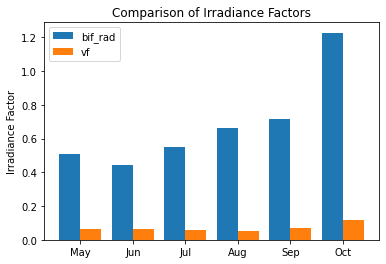

In [126]:
dates_e = ['May','Jun','Jul','Aug','Sep','Oct','Nov']
x_axis = np.arange(len(dates))
# Multi bar Chart
plt.bar(x_axis -0.2, Rad_irr_factor, width=0.4, label = 'bif_rad')
plt.bar(x_axis +0.2, VF_irr_factor, width=0.4, label = 'vf')
# Xticks
plt.xticks(x_axis, dates)
# Add legend and titles
plt.legend()
plt.title('Comparison of Irradiance Factors')
plt.ylabel('Irradiance Factor')
# Display
plt.show()

[0.12972750411887518, 0.18822993630779164, 0.13293690376687894, 0.06263773635311651, 0.07144001824316604, 0.09091666056461582, 0.1051991800021125, 0.10224795495834828, 0.12486402086597634, 0.14727970181913433, 0.16793713122788106, 0.15528083835590611]


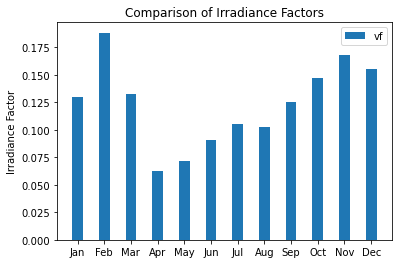

In [56]:
VF_all =  VF_irr_factor
VF_all.append(df['Nov'].min()/dghi[10])
VF_all.append(df['Dec'].min()/dghi[11])
VF_all.insert(0,df['Apr'].min()/dghi[3])
VF_all.insert(0,df['Mar'].min()/dghi[2])
VF_all.insert(0,df['Feb'].min()/dghi[1])
VF_all.insert(0,df['Jan'].min()/dghi[0])
print(VF_all)
dates_e = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x_axis = np.arange(len(dates_e))
# Multi bar Chart
plt.bar(x_axis, VF_all, width=0.4, label = 'vf')
# Xticks
plt.xticks(x_axis, dates_e)
# Add legend and titles
plt.legend()
plt.title('Comparison of Irradiance Factors')
plt.ylabel('Irradiance Factor')
# Display
plt.show()

In [ ]:
monthlyGHI = pd.DataFrame(data['ghi'].groupby([pd.Grouper(freq='M')]).sum())

In [ ]:
monthlyGHI['Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
monthlyGHI.set_index(monthlyGHI['Month'], inplace=True)
monthlyGHI = monthlyGHI.drop(columns='Month')

In [ ]:
print(monthlyGHI)

In [ ]:
df_norm = df.T
df_norm = df_norm.div(monthlyGHI['ghi'], axis=0)
df_norm = df_norm.T

In [ ]:
fig = (df_norm).plot()
fig.set_xlabel('Position between start of row and next row [%]')
fig.set_ylabel('Normalized Insolation for the month/GHI')